# Task 1 Prediction using Supervised Machine Learning 
## predict the percentage of students based on the study hours 
### What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Importing the dataset

In [2]:
#importing the dataset
url="http://bit.ly/w-data"
df=pd.read_csv(url)
print("data uploded succesfully")

data uploded succesfully


performing the Exploratory Data Analytics

In [3]:
# exploring the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [5]:
df.shape

(25, 2)

## performing the data Visulization

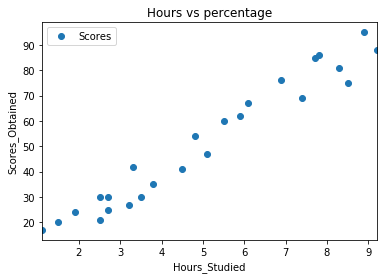

In [7]:


# visualizing the data that can help to better understand the data 
%matplotlib inline
df.plot(x='Hours', y='Scores', style='o')
plt.xlabel("Hours_Studied")
plt.ylabel("Scores_Obtained")
plt.title("Hours vs percentage")
plt.show()

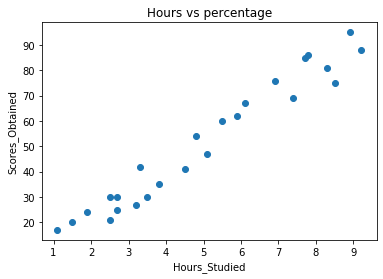

In [8]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel("Hours_Studied")
plt.ylabel("Scores_Obtained")
plt.title("Hours vs percentage")
plt.show()

## calculating the corelation between the values

In [9]:
# here we try to findout the corelation between hours and scores
np.corrcoef(df["Hours"], df["Scores"])

array([[1.        , 0.97619066],
       [0.97619066, 1.        ]])

Hence from the above graph as well as the corelation coeffient it is crystal clear that their is the postive correlation between the two that is Hours studied and the Score Obtained


## Dividing the data set 

In [10]:
# now we are going to prepare our data  and dividing the data for the traning and test data 
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values
#this is going to divide our dataset into input and outputs

In [11]:
print(x)
print("now we are going to print y")
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
now we are going to print y
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [12]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Splitting the Dataset into train and test data Sample 

In [13]:
# now we are going to split our dataset into traning and test dataset for this we are goin to use the split function from the sklearb
from sklearn.model_selection import train_test_split


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [15]:
print(x_train)# checking that our data is completly split

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [16]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# as we have completed with our data so it is the time to train our model so that we can find a line that best fits our scatter plot and we can predict certain more values

In [17]:
# importing library
from sklearn.linear_model import LinearRegression

In [18]:
reg=LinearRegression()

In [19]:
reg.fit(x_train,y_train)
print("the traning is complete you can procede further")

the traning is complete you can procede further


In [20]:
print(reg.fit(x_train,y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [21]:
# plotting the best fit line in the curve 
line=reg.coef_*x+reg.intercept_

In [22]:
print(line)

[[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]


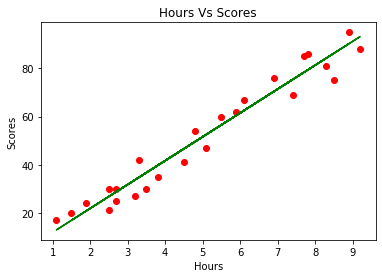

In [23]:
plt.scatter(x,y,color='red')
plt.plot(x,line,color='green')
plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


In [24]:
#since we are done with the training of our dataset our next task is to calculate the predicted value
y_pred=reg.predict(x_test)

In [25]:
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [26]:
# appending the predicted value in the dataframe as follows
df_pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [27]:
df_pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Calculating the error in the predicted value calculated with the help of the algorithm

In [28]:
# As we have seen their is an Error in the above model therefore we can evaluate the error
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
rmse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [30]:
print("The root mean squared error of the proposed agorithm is {} and the r2 value is {} ".format ({rmse},{r2}))

The root mean squared error of the proposed agorithm is {21.5987693072174} and the r2 value is {0.9454906892105356} 


In [31]:
# also calculating the mean square error of the proposed algorithm is 
from sklearn import metrics

In [32]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [34]:
# calculating the score when the study hours is 9.25
hours_to_pred=[[9.25]]
score_pred=reg.predict(hours_to_pred)

In [35]:
print(score_pred)

[93.69173249]
